                                              4.10: Coding Etiquette & Excel Reporting     

This notebook contains the following-

1. Import libraries and data exported from 4.9
2. Address security implications

3. Create a regional segmentation of the data
- 3.1. Set up region column
- 3.2. Create a crosstab to compare spending habits in different regions

4. Create an exclusion flag to exclude low-activity customers from the data

5. Create profiling variables
- 5.1. Age
- 5.2 Income
- 5.3 Number of Dependents

6. Visualizations to show distributions of profiles
- 6.1. Age Groups
- 6.2. Income Groups
- 6.3. Customers w/ Dependents

7. Aggregate max, min, & mean variables on customer-profile level for usage frequency and expenditure
- 7.1. Age Group
- 7.2. Income Group
- 7.3. Dependents Category

8. Compare customer profiles w/ regions & departments. Identify any links. Customers may demonstrate different behaviors across regions, which could 
make this information important.
- 8.1 Profile by Region
- 8.2 Profile by Department Sales
- 8.3. Profiles by Frequency

9. Visualizations

10. Export Final Data Set

                                                             1. Import libraries and data exported from 4.9

In [34]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [35]:
#creating path
path = r'C:\Users\25670\Desktop\Intercart Basket Analysis16.07.2024'

In [36]:
path

'C:\\Users\\25670\\Desktop\\Intercart Basket Analysis16.07.2024'

In [37]:
import warnings
warnings.simplefilter(action ='ignore', category=FutureWarning)

In [38]:
# Import most up-to-date project data

instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [39]:
instacart.shape

(1000000, 29)

In [40]:
# Creating new column "max_order"

instacart['max_order'] = instacart.groupby(['user_id'])['order_number'].transform(np.max)

In [41]:
# Assign loyalty flag
instacart.loc[instacart['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

instacart.loc[(instacart['max_order'] <= 40) & (instacart['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

instacart.loc[instacart['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [42]:
# Check loyalty flags
instacart['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    473070
Loyal customer      287917
New customer        239013
Name: count, dtype: int64

In [43]:
# Creating column for average spender
instacart['average_spend']=instacart.groupby(['user_id'])['prices'].transform(np.mean)

In [44]:
# Creating flag for low and high spender
instacart.loc[instacart['average_spend']<10,'spender_flag']='Low_spender'

instacart.loc[instacart['average_spend']>= 10, 'spender_flag'] = 'High_spender'

In [45]:
# Check spender flags
instacart['spender_flag'].value_counts(dropna = False)

spender_flag
Low_spender     805506
High_spender    194494
Name: count, dtype: int64

In [46]:
# Create a column for frequet users
instacart['Customer_frequency'] = instacart.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

In [47]:
# Creating flag on order frequency
instacart.loc[instacart['Customer_frequency'] > 20, 'frequency_flag'] = 'Non_frequent_customer'

instacart.loc[(instacart['Customer_frequency']>10) & (instacart['Customer_frequency']<=20),'frequency_flag'] = 'Regular customer'

instacart.loc[instacart['Customer_frequency'] <= 10, 'frequency_flag'] = 'Frequent Customer'

In [48]:
# Check frequency flags

instacart['frequency_flag'].value_counts(dropna = False)

frequency_flag
Frequent Customer        641346
Regular customer         221585
Non_frequent_customer    128877
NaN                        8192
Name: count, dtype: int64

In [49]:
#Checking dataframe
instacart.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,busiest_days,busiest_day,busiest_period_of_day,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,1987,3139998,138,28,6,11,3.0,5,0,both,Regularly busy Days,Regularly busy,Regularly busy,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,30,Regular customer,12.900000,High_spender,6.5,Frequent Customer
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1989,1977647,138,30,6,17,20.0,1,1,both,Regularly busy Days,Regularly busy,Regularly busy,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,30,Regular customer,12.900000,High_spender,6.5,Frequent Customer
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,11433,11433,389851,709,2,0,21,6.0,20,0,both,Busiest Days,Busiest day,Busiest day,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,5,New customer,5.288889,Low_spender,7.0,Frequent Customer
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,12198,12198,652770,764,1,3,13,NaN,10,0,both,Slowest Days,Regularly busy,Regularly busy,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,3,New customer,5.800000,Low_spender,9.0,Frequent Customer
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,12200,12200,1813452,764,3,4,17,9.0,11,1,both,Slowest Days,Least busy,Least busy,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,3,New customer,5.800000,Low_spender,9.0,Frequent Customer


                                                            2. Address security implications

In [50]:
#  Display all the columns of a DataFrame

pd.options.display.max_columns = None

In [51]:
# Check data for reminder of contents
instacart.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,busiest_days,busiest_day,busiest_period_of_day,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,1987,3139998,138,28,6,11,3.0,5,0,both,Regularly busy Days,Regularly busy,Regularly busy,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,30,Regular customer,12.900000,High_spender,6.5,Frequent Customer
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1989,1977647,138,30,6,17,20.0,1,1,both,Regularly busy Days,Regularly busy,Regularly busy,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,30,Regular customer,12.900000,High_spender,6.5,Frequent Customer
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,11433,11433,389851,709,2,0,21,6.0,20,0,both,Busiest Days,Busiest day,Busiest day,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,5,New customer,5.288889,Low_spender,7.0,Frequent Customer
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,12198,12198,652770,764,1,3,13,NaN,10,0,both,Slowest Days,Regularly busy,Regularly busy,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,3,New customer,5.800000,Low_spender,9.0,Frequent Customer
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,12200,12200,1813452,764,3,4,17,9.0,11,1,both,Slowest Days,Least busy,Least busy,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,3,New customer,5.800000,Low_spender,9.0,Frequent Customer


In [52]:
#dropping first and last name-First name and last name should be dropped due to PII
instacart.drop(['First Name', 'Last Name'], axis=1, inplace = True)

In [53]:
#checking column names
instacart.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id',
       'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'busiest_days', 'busiest_day', 'busiest_period_of_day', 'Gender',
       'State', 'Age', 'Date Joined', 'Number of Dependents', 'Family Status',
       'Income', 'max_order', 'loyalty_flag', 'average_spend', 'spender_flag',
       'Customer_frequency', 'frequency_flag'],
      dtype='object')

                                                        3. Create a regional segmentation of the data

                        3.1. Set up region column:

In [54]:
# Create Region column - organize by state and region

northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont' ]

In [55]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [56]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [57]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [58]:
# Create region columns
instacart.loc[instacart['State'].isin(northeast_region), 'region'] = 'Northeast'

In [59]:
instacart.loc[instacart['State'].isin(midwest_region), 'region'] = 'Midwest'

In [60]:
instacart.loc[instacart['State'].isin(south_region), 'region'] = 'South'

In [61]:
instacart.loc[instacart['State'].isin(west_region), 'region'] = 'West'

In [62]:
# Checking length of new column

len(instacart['region'])

1000000

In [63]:
# Checking data
instacart['region'].value_counts(dropna = False)

region
South        333337
West         255990
Midwest      233768
Northeast    176905
Name: count, dtype: int64

                                   3.2. Creating a crosstab to compare spending habits in different U.S. regions

In [64]:
# create a crosstab between 'region' and 'spending_flag'

region_spending_crosstab = pd.crosstab(instacart['region'], instacart['spender_flag'], dropna = False)

In [65]:
# Could save to clipboard and open in Excel, but it should be a small table that can be viewed here
region_spending_crosstab

spender_flag,High_spender,Low_spender
region,,
Midwest,45824,187944
Northeast,34605,142300
South,64044,269293
West,50021,205969


Spending habits are very similar between regions when looking at the proportions of customers in each region. 
The greatest proportion of 'High spender' customers was 2.10% in the South, whereas the lowest proportion of 'High spender' customers was 1.93% 
in the Northeast.

                           4. Create an exclusion flag for low-activity customers and export this sample.

In [67]:
# Exclude customers w/ max_order less than 5 
instacart.loc[instacart['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [68]:
# Keep customers where max_order is greater than or equal to 5
instacart.loc[instacart['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [69]:
# Check table
instacart.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,busiest_days,busiest_day,busiest_period_of_day,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,region,exclusion_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,1987,3139998,138,28,6,11,3.0,5,0,both,Regularly busy Days,Regularly busy,Regularly busy,Male,Minnesota,81,8/1/2019,1,married,49620,30,Regular customer,12.900000,High_spender,6.5,Frequent Customer,Midwest,Keep
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1989,1977647,138,30,6,17,20.0,1,1,both,Regularly busy Days,Regularly busy,Regularly busy,Male,Minnesota,81,8/1/2019,1,married,49620,30,Regular customer,12.900000,High_spender,6.5,Frequent Customer,Midwest,Keep
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,11433,11433,389851,709,2,0,21,6.0,20,0,both,Busiest Days,Busiest day,Busiest day,Female,Vermont,66,6/16/2018,2,married,158302,5,New customer,5.288889,Low_spender,7.0,Frequent Customer,Northeast,Keep
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,12198,12198,652770,764,1,3,13,NaN,10,0,both,Slowest Days,Regularly busy,Regularly busy,Female,Wisconsin,40,2/9/2020,3,married,31308,3,New customer,5.800000,Low_spender,9.0,Frequent Customer,Midwest,Exclude
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,12200,12200,1813452,764,3,4,17,9.0,11,1,both,Slowest Days,Least busy,Least busy,Female,Wisconsin,40,2/9/2020,3,married,31308,3,New customer,5.800000,Low_spender,9.0,Frequent Customer,Midwest,Exclude


In [70]:
# Check frequencies
instacart['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       921270
Exclude     78730
Name: count, dtype: int64

In [71]:
# Check exclusion flag using crosstab
exclusion_flag_check = pd.crosstab(instacart['exclusion_flag'], instacart['max_order'], dropna = False)

In [72]:
exclusion_flag_check.to_clipboard()

The exclusion flag was verified in Excel - All rows where max_order is less than 5 are marked with 'Exclude'.

In [73]:
# Create sample without 'exclude' rows called ords_prods_in
instacart = instacart[instacart['exclusion_flag'] == 'Keep']

In [74]:
# Check sample
instacart.shape

(921270, 35)

Since the number of rows in the dataset matches the frequency of "Keep" entries in the "Exclusion_Flag" column, 
we can confidently conclude that this sample contains only the relevant data, excluding any rows related to customers who have made fewer than 5 orders. 
This ensures that the dataset focuses solely on customers who are active users of the platform, providing a more accurate representation for analysis.

In [76]:
# Export Sample
instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_sample.pkl'))

                                                      5. Create profiling variables

                           5.1. Age

The age categories are subjective, but based on standard ranges. Young adult =< 25, Adult 25-45,Older Adult 45-65 Senior 65+

In [77]:
#Creating age profiling variable

instacart.loc[instacart['Age']<=25, 'age_group']='Young Adult'
instacart.loc[(instacart['Age']>25)&(instacart['Age']<45), 'age_group']='Adult'
instacart.loc[(instacart['Age']>=45)&(instacart['Age']<65), 'age_group']='Older Adult'
instacart.loc[instacart['Age']>=65, 'age_group']='Senior'

In [78]:
# Check frequency of age_group and ensure no NaNs
instacart['age_group'].value_counts(dropna = False)

age_group
Older Adult    289991
Adult          270752
Senior         243672
Young Adult    116855
Name: count, dtype: int64

In [79]:
instacart.dropna()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,busiest_days,busiest_day,busiest_period_of_day,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,region,exclusion_flag,age_group
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,1987,3139998,138,28,6,11,3.0,5,0,both,Regularly busy Days,Regularly busy,Regularly busy,Male,Minnesota,81,8/1/2019,1,married,49620,30,Regular customer,12.900000,High_spender,6.5,Frequent Customer,Midwest,Keep,Senior
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1989,1977647,138,30,6,17,20.0,1,1,both,Regularly busy Days,Regularly busy,Regularly busy,Male,Minnesota,81,8/1/2019,1,married,49620,30,Regular customer,12.900000,High_spender,6.5,Frequent Customer,Midwest,Keep,Senior
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,11433,11433,389851,709,2,0,21,6.0,20,0,both,Busiest Days,Busiest day,Busiest day,Female,Vermont,66,6/16/2018,2,married,158302,5,New customer,5.288889,Low_spender,7.0,Frequent Customer,Northeast,Keep,Senior
5,0,1,Chocolate Sandwich Cookies,61,19,5.8,12372,12372,1701441,777,16,1,7,26.0,7,0,both,Busiest Days,Regularly busy,Regularly busy,Female,Hawaii,51,1/4/2019,2,married,57797,16,Regular customer,5.800000,Low_spender,26.0,Non_frequent_customer,West,Keep,Older Adult
7,0,1,Chocolate Sandwich Cookies,61,19,5.8,14603,14603,1290456,910,12,3,10,30.0,1,0,both,Slowest Days,Regularly busy,Regularly busy,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,12,Regular customer,5.800000,Low_spender,30.0,Non_frequent_customer,South,Keep,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,2078,2078,Unsalted Pure Irish Butter,36,16,13.5,1705992,1705992,1267617,102418,9,3,14,21.0,10,1,both,Slowest Days,Regularly busy,Regularly busy,Male,Florida,21,8/10/2017,2,living with parents and siblings,58212,9,New customer,7.385714,Low_spender,17.5,Regular customer,South,Keep,Young Adult
999993,2078,2078,Unsalted Pure Irish Butter,36,16,13.5,1707225,1707225,2101623,102494,28,2,17,15.0,12,0,both,Regularly busy Days,Regularly busy,Regularly busy,Male,Michigan,54,12/27/2019,1,married,105222,38,Regular customer,9.938889,Low_spender,4.0,Frequent Customer,Midwest,Keep,Older Adult
999994,2078,2078,Unsalted Pure Irish Butter,36,16,13.5,1707681,1707681,807407,102527,4,3,8,11.0,3,0,both,Slowest Days,Regularly busy,Regularly busy,Male,Kansas,30,12/25/2017,2,married,87983,41,Loyal customer,7.737500,Low_spender,6.5,Frequent Customer,Midwest,Keep,Adult
999995,2078,2078,Unsalted Pure Irish Butter,36,16,13.5,1707702,1707702,2280887,102527,25,6,14,6.0,1,1,both,Regularly busy Days,Regularly busy,Regularly busy,Male,Kansas,30,12/25/2017,2,married,87983,41,Loyal customer,7.737500,Low_spender,6.5,Frequent Customer,Midwest,Keep,Adult


In [80]:
# Aggregate for age group usage frequency

instacart.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Adult                    10.735004  0.0  30.0
Older Adult              10.699347  0.0  30.0
Senior                   10.707029  0.0  30.0
Young Adult              10.703177  0.0  30.0

In [81]:
# Aggregate for age group expenditure

instacart.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.727256  1.0  24.5
Older Adult  7.757943  1.0  24.5
Senior       7.712845  1.0  24.5
Young Adult  7.746541  1.0  24.5

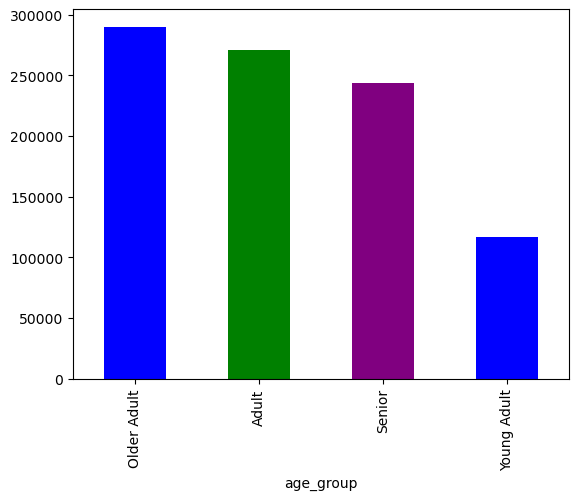

In [82]:
# Age profile visualization

bar=instacart['age_group'].value_counts().plot.bar(color =['blue', 'green', 'purple'])

In [83]:
# Export Bar Chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_agegroup.png'))

                                   5.2. Income

Categorize customers into income categories: low, middle, & high income groups based on standard considerations of US incomes.

In [84]:
# Ensure you modify the DataFrame directly
instacart.loc[instacart['Income'] <= 50000, 'Income_group'] = 'Low'
instacart.loc[(instacart['Income'] > 50000) & (instacart['Income'] <= 100000), 'Income_group'] = 'Middle'
instacart.loc[instacart['Income'] > 100000, 'Income_group'] = 'High'


In [85]:
# Check frequency of income_group and ensure no NaNs
instacart['Income_group'].value_counts(dropna = False)

Income_group
High      423017
Middle    392966
Low       105287
Name: count, dtype: int64

In [86]:
# Aggregate for income group order frequency

instacart.groupby('Income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
Income_group                                  
High                      10.646332  0.0  30.0
Low                       11.051648  0.0  30.0
Middle                    10.692676  0.0  30.0

In [87]:
# Aggregate for income group expenditure

instacart.groupby('Income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
Income_group                     
High          7.842640  1.0  24.5
Low           7.182470  1.0  24.5
Middle        7.768456  1.0  24.5

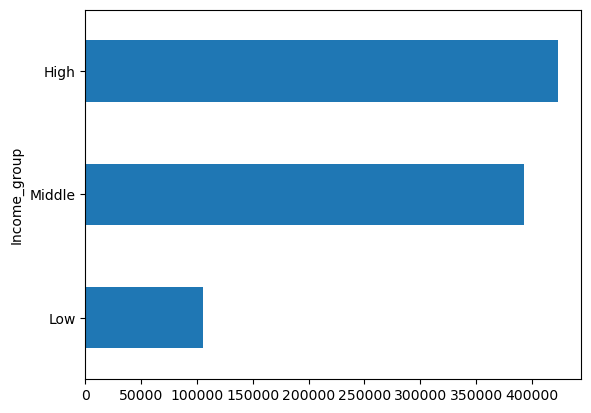

In [88]:
# Income profile visualization

bar2 = instacart['Income_group'].value_counts().sort_values().plot.barh()

In [89]:
# Export Bar Chart

bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_incomegroup.png'))

                                         5.3. Number of Dependants

Divide data into customers with dependents and customers without dependents

In [90]:
#Divide data into customers with dependents and customers without dependents

instacart.loc[instacart['Number of Dependents'] == 0, 'Dependents_flag'] = 'No Dependents'

In [91]:
# Update 'dependents_flag' where 'number_of_dependants' is greater than 0
instacart.loc[instacart['Number of Dependents'] > 0, 'Dependents_flag'] = 'Has Dependents'

# Update 'dependents_flag' where 'nunber_of_dependants' is 0
instacart.loc[instacart['Number of Dependents'] == 0, 'Dependents_flag'] = 'No Dependents'

In [92]:
#Check data
instacart['Dependents_flag'].value_counts(dropna = False)

Dependents_flag
Has Dependents    689952
No Dependents     231318
Name: count, dtype: int64

In [93]:
# Aggregate for dependent group order frequency

instacart.groupby('Dependents_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
Dependents_flag                                  
Has Dependents               10.730718  0.0  30.0
No Dependents                10.657525  0.0  30.0

In [94]:
# Aggregate for dependent group expenditure

instacart.groupby('Dependents_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
Dependents_flag                     
Has Dependents   7.730868  1.0  24.5
No Dependents    7.749515  1.0  24.5

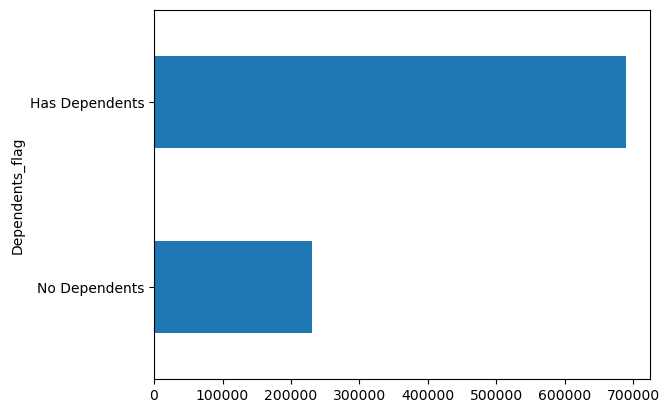

In [95]:
# Number of dependent group profile visualization

bar10 = instacart['Dependents_flag'].value_counts().sort_values().plot.barh()

In [96]:
# Export Bar Chart

bar10.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_dependentgroup.png'))

                                                 6. Visualizations to show distributions of profiles

In [97]:
print(instacart.columns)

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id',
       'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'busiest_days', 'busiest_day', 'busiest_period_of_day', 'Gender',
       'State', 'Age', 'Date Joined', 'Number of Dependents', 'Family Status',
       'Income', 'max_order', 'loyalty_flag', 'average_spend', 'spender_flag',
       'Customer_frequency', 'frequency_flag', 'region', 'exclusion_flag',
       'age_group', 'Income_group', 'Dependents_flag'],
      dtype='object')


In [98]:
# Create a unique user_id sample and take relevant columns

user_sample = instacart[['user_id', 'age_group', 'Income_group', 'Dependents_flag', 'region', 'loyalty_flag']]

In [99]:
# Remove duplicate rows in the user_sample to obtain a sample of all unique customers
user_sample = user_sample.drop_duplicates()

In [100]:
# Check data
user_sample

,user_id,age_group,Income_group,Dependents_flag,region,loyalty_flag
0,138,Senior,Low,Has Dependents,Midwest,Regular customer
2,709,Senior,High,Has Dependents,Northeast,New customer
5,777,Older Adult,Middle,Has Dependents,West,Regular customer
7,910,Senior,Low,No Dependents,South,Regular customer
8,1052,Senior,High,Has Dependents,West,Regular customer
...,...,...,...,...,...,...
999791,100051,Senior,High,Has Dependents,Northeast,Regular customer
999846,100701,Adult,Middle,Has Dependents,Northeast,Regular customer
999895,101342,Adult,High,Has Dependents,West,New customer
999896,101367,Adult,Low,Has Dependents,Midwest,New customer


In [101]:
loyalty_flag = {'New': 1, 'Regular': 2, 'Loyal': 3}

                                       6.1. Age Groups

In [102]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [103]:
## Create age_group counts table
age_group_counts = user_sample['age_group'].value_counts()

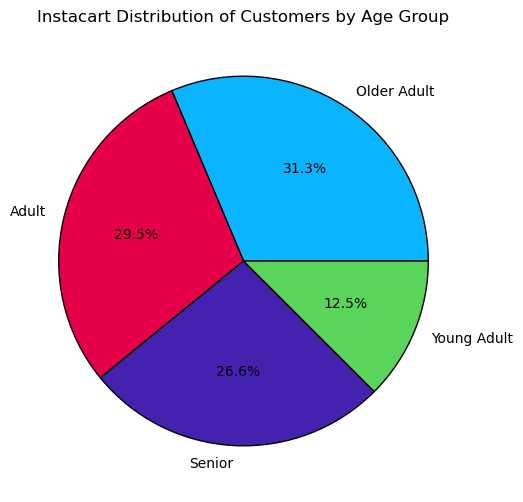

In [104]:
# Pie Chart
plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(age_group_counts, 
        labels = age_group_counts.index, 
        autopct='%.1f%%', # Show percentage to 1 d.p
        colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Instacart Distribution of Customers by Age Group') # title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save
plt.show()

                                                6.2. Income Groups

In [105]:
## Create a table of income_group counts
income_group_counts = user_sample['Income_group'].value_counts()

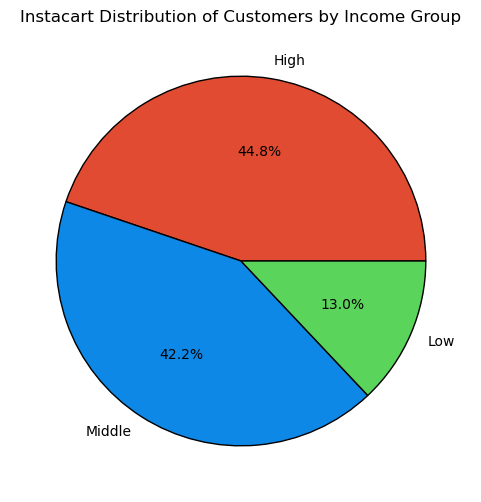

In [106]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_group_counts, 
        labels = income_group_counts.index, 
        autopct='%.1f%%',
        colors = ['#e14b31', '#0d88e6', '#5ad45a'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Distribution of Customers by Income Group')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'customers_income_groups_pie.png'), bbox_inches = 'tight')
plt.show()

                                                                  6.3. Dependants

In [107]:
# create a table of dependents_flag counts
dependents_flag_counts = user_sample['Dependents_flag'].value_counts()

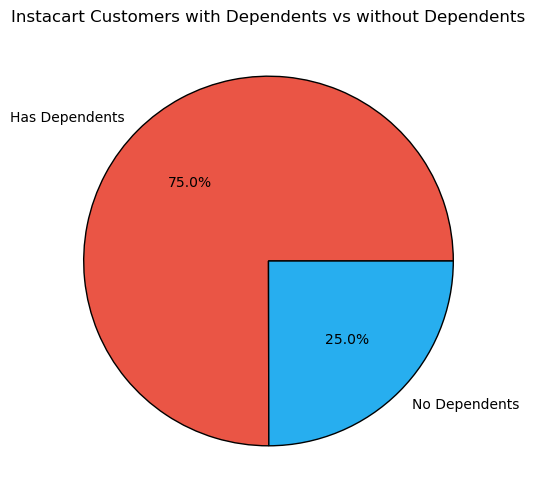

In [108]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(dependents_flag_counts, 
        labels = dependents_flag_counts.index, 
        autopct='%.1f%%', 
        colors = ['#ea5545', '#27aeef'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Customers with Dependents vs without Dependents')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'customers_dependants_pie.png'), bbox_inches = 'tight')
plt.show()

              7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

Usage frequency is analyzed based on days since prior order & expenditure based on prices columns. 
For accuracy, aggregate the data from the instacart DataFrame so that each row represents a single order. 
This approach prevents averages from being skewed by customer orders comprising many items.

In [109]:
# An aggregated subset of data with 'prices' column as the total cost of each order:
orders_subset = instacart.groupby(['user_id', 'age_group', 'Income_group', 'Dependents_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [110]:
# Rename 'prices' to 'order_total'
orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [111]:
# Check subset
orders_subset

,user_id,age_group,Income_group,Dependents_flag,loyalty_flag,region,order_number,days_since_prior_order,order_total
0,1,Adult,Low,Has Dependents,New customer,South,2,15.0,9.0
1,1,Adult,Low,Has Dependents,New customer,South,3,21.0,9.0
2,1,Adult,Low,Has Dependents,New customer,South,4,29.0,9.0
3,1,Adult,Low,Has Dependents,New customer,South,5,28.0,9.0
4,1,Adult,Low,Has Dependents,New customer,South,6,19.0,9.0
...,...,...,...,...,...,...,...,...,...
715512,206208,Older Adult,High,Has Dependents,Loyal customer,Midwest,38,19.0,4.9
715513,206208,Older Adult,High,Has Dependents,Loyal customer,Midwest,46,13.0,11.3
715514,206208,Older Adult,High,Has Dependents,Loyal customer,Midwest,49,7.0,4.2
715515,206209,Senior,High,Has Dependents,New customer,Midwest,4,30.0,11.1


                                                    7.1. Aggregations by Age Group

In [112]:
# max, min, mean by age category
aggregations_by_age_cat = orders_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_age_cat

days_since_prior_order                  order_total            \
                               min       mean   max         min      mean   
age_group                                                                   
Adult                          0.0  10.612983  30.0         1.0  9.437236   
Older Adult                    0.0  10.586326  30.0         1.0  9.544962   
Senior                         0.0  10.593717  30.0         1.0  9.448847   
Young Adult                    0.0  10.577005  30.0         1.0  9.509944   

                   
              max  
age_group          
Adult        72.0  
Older Adult  80.1  
Senior       79.4  
Young Adult  67.5

                                                  7.2. Aggregations by Income Group

In [113]:
# max, min, mean by age category
aggregations_by_income_cat = orders_subset.groupby('Income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_income_cat

days_since_prior_order                  order_total            \
                                min       mean   max         min      mean   
Income_group                                                                 
High                            0.0  10.519139  30.0         1.0  9.681512   
Low                             0.0  11.006426  30.0         1.0  8.527353   
Middle                          0.0  10.562307  30.0         1.0  9.535597   

                    
               max  
Income_group        
High          80.1  
Low           65.8  
Middle        73.5

Lower income customers spend less on average and shop very slightly less often
All age groups tend to shop and spend with similar frequency

                                                 7.3. Aggregations by Dependants Category

In [114]:
# max, min, mean by dependents category
aggregations_by_dependents_cat = orders_subset.groupby('Dependents_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                               'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_dependents_cat

days_since_prior_order                  order_total            \
                                   min       mean   max         min      mean   
Dependents_flag                                                                 
Has Dependents                     0.0  10.612614  30.0         1.0  9.487346   
No Dependents                      0.0  10.542544  30.0         1.0  9.471389   

                       
                  max  
Dependents_flag        
Has Dependents   80.1  
No Dependents    68.7

Whether or not a customer has dependents doesn't seem to make a substantial difference to shopping or spending

                               8. Compare customer profiles with regions and departments and identify any links?

The behaviors to be examined include frequency/loyalty, product_prices, and order_totals. 
Customer profile variables to be compared across regions and department sales

In [115]:
# Get names of each department back into the data
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [116]:
#Rename column 'Unnamed: 0' to 'department_id'

df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [117]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [118]:
# Turning department dataframe into data dictionary
zipped = zip (df_dept['department_id'], df_dept['department'])
data_dict = dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [119]:
# Connect department names to department_id in dataframe

instacart['department'] = instacart['department_id'].map(data_dict)

In [120]:
# Checking dataframe

instacart.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,busiest_days,busiest_day,busiest_period_of_day,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,region,exclusion_flag,age_group,Income_group,Dependents_flag,department
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,1987,3139998,138,28,6,11,3.0,5,0,both,Regularly busy Days,Regularly busy,Regularly busy,Male,Minnesota,81,8/1/2019,1,married,49620,30,Regular customer,12.900000,High_spender,6.5,Frequent Customer,Midwest,Keep,Senior,Low,Has Dependents,snacks
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1989,1977647,138,30,6,17,20.0,1,1,both,Regularly busy Days,Regularly busy,Regularly busy,Male,Minnesota,81,8/1/2019,1,married,49620,30,Regular customer,12.900000,High_spender,6.5,Frequent Customer,Midwest,Keep,Senior,Low,Has Dependents,snacks
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,11433,11433,389851,709,2,0,21,6.0,20,0,both,Busiest Days,Busiest day,Busiest day,Female,Vermont,66,6/16/2018,2,married,158302,5,New customer,5.288889,Low_spender,7.0,Frequent Customer,Northeast,Keep,Senior,High,Has Dependents,snacks
5,0,1,Chocolate Sandwich Cookies,61,19,5.8,12372,12372,1701441,777,16,1,7,26.0,7,0,both,Busiest Days,Regularly busy,Regularly busy,Female,Hawaii,51,1/4/2019,2,married,57797,16,Regular customer,5.800000,Low_spender,26.0,Non_frequent_customer,West,Keep,Older Adult,Middle,Has Dependents,snacks
7,0,1,Chocolate Sandwich Cookies,61,19,5.8,14603,14603,1290456,910,12,3,10,30.0,1,0,both,Slowest Days,Regularly busy,Regularly busy,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,12,Regular customer,5.800000,Low_spender,30.0,Non_frequent_customer,South,Keep,Senior,Low,No Dependents,snacks


Department-Baby Profile

In [121]:
# Creating baby department profiling variable

instacart['baby_status'] = [1 if x == 'babies' else 0 for x in instacart['department']]
instacart['baby_status'] = instacart.groupby(['user_id'])['baby_status'].transform(np.max)

In [122]:
# Checking new variable

instacart['baby_status'].value_counts(dropna=False)

baby_status
0    833559
1     87711
Name: count, dtype: int64

In [123]:
# Aggregatefor baby status bracket order frequency

instacart.groupby('baby_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
baby_status                                  
0                        10.915500  0.0  30.0
1                         8.806761  0.0  30.0

In [124]:
# Check sample
instacart.shape

(921270, 40)

In [125]:
# Aggregate for baby status bracket expenditure

instacart.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
baby_status                     
0            7.740044  1.0  24.5
1            7.692841  1.0  24.3

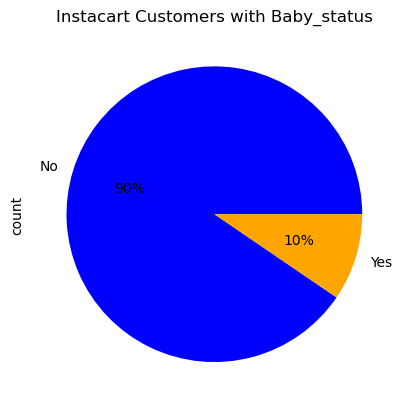

In [126]:
# Baby Status Visualization

pie = instacart['baby_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['blue','orange'])

plt.title('Instacart Customers with Baby_status')

# Export pie chart

pie.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'pei_babystatus.png'))

                                                  Department -Alcohol Profile

In [127]:
# Creating alcohol profiling variable

instacart['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in instacart['department']]
instacart['alcohol_status'] = instacart.groupby(['user_id'])['alcohol_status'].transform(np.max)

In [128]:
# Checking new variable

instacart['alcohol_status'].value_counts(dropna=False)

alcohol_status
0    892226
1     29044
Name: count, dtype: int64

In [129]:
# Aggregate for alcohol_status bracket order frequency

instacart.groupby('alcohol_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
alcohol_status                                  
0                           10.749610  0.0  30.0
1                            9.570728  0.0  30.0

In [130]:
# Aggregate for alcohol_status bracket expenditure

instacart.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
alcohol_status                     
0               7.747532  1.0  24.5
1               7.367460  1.0  24.3

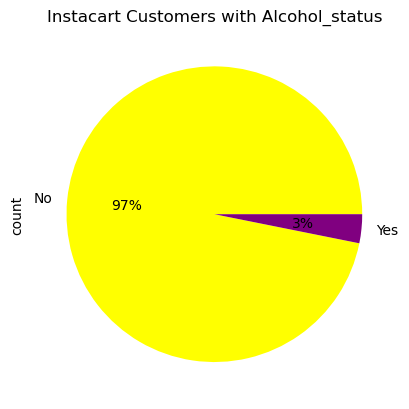

In [131]:
# Alcohol_status visualization

pie2 = instacart['alcohol_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['yellow','purple'])

plt.title('Instacart Customers with Alcohol_status')

# Export alcohol_status pie chart

pie2.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'pie_alcoholstatus.png'))

                                                           Department -Pet Profile

In [132]:
#Creating pet profiling variable: 
#bought pet supplies(1) 
#didn't buy pet supplies (0)

instacart['pet_status'] = [1 if x == 'pets' else 0 for x in instacart['department']]
instacart['pet_status']=instacart.groupby(['user_id'])['pet_status'].transform(np.max)

In [133]:
# Checking new variable

instacart['pet_status'].value_counts(dropna=False)

pet_status
0    900566
1     20704
Name: count, dtype: int64

In [134]:
#Aggregating for pet_status bracket order frequency
instacart.groupby('pet_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                             mean  min   max
pet_status                                  
0                       10.720157  0.0  30.0
1                       10.373636  0.0  30.0

In [135]:
#Aggregating for pet_status bracket expenditure
instacart.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
pet_status                     
0           7.726827  1.0  24.5
1           8.114963  1.0  23.8

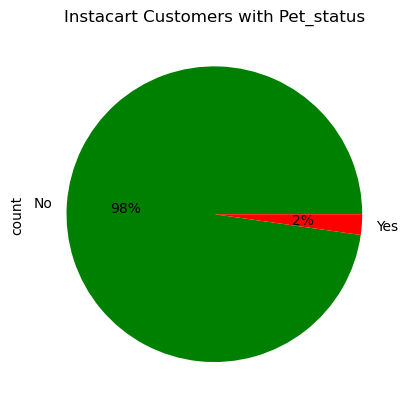

In [136]:
# Pet_status Visualization

pie3 = instacart['pet_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['green','red'])

plt.title('Instacart Customers with Pet_status')

# Export Pet_status Pie Chart

pie3.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'pie_petstatus.png'))

8. Compare your customer profiles with regions and departments. 
Produce suitable charts to illustrate your reports and export them in your project folder.¶

8.1. Profile by Region

8.1.1. Income Groups

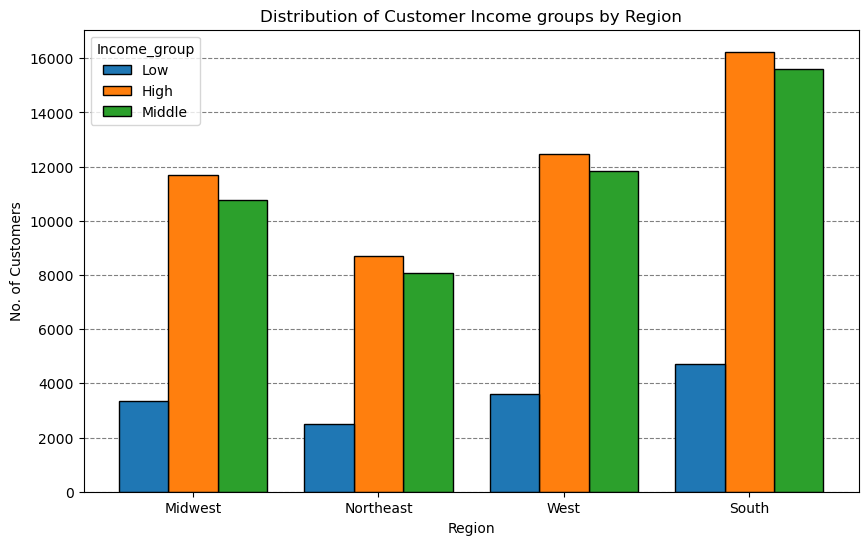

In [137]:
# A histogram could work to show the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='Income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

In [138]:
# Check above graph using crosstab
pd.crosstab(user_sample['Income_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
Income_group,,,,
High,11674,8717,16241,12474
Low,3355,2515,4726,3618
Middle,10783,8086,15600,11825


8.1.2. Age Groups

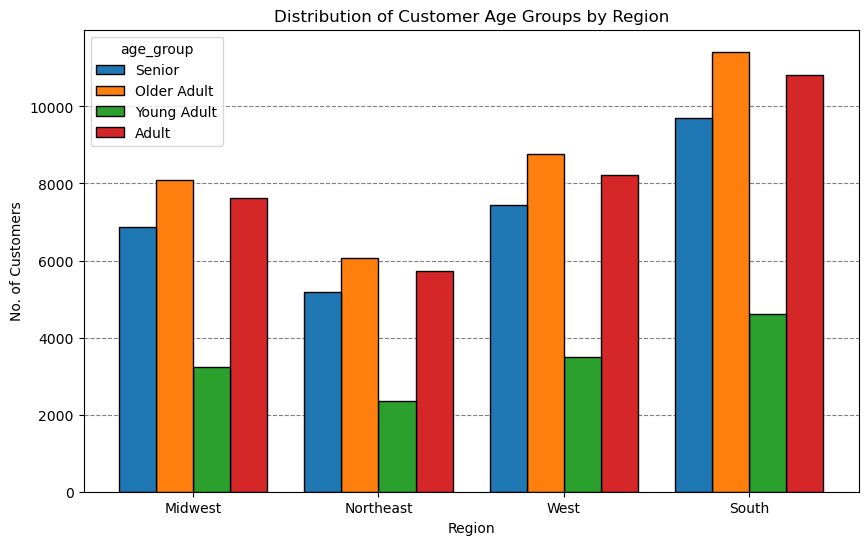

In [139]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

8.1.3 Department groups

In [140]:
# Check above graph using crosstab
pd.crosstab(user_sample['age_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
age_group,,,,
Adult,7631,5731,10819,8207
Older Adult,8091,6072,11419,8773
Senior,6858,5172,9704,7449
Young Adult,3232,2343,4625,3488


In [141]:
# Creating crosstab for region and department

region_dep = pd.crosstab(instacart['department'], instacart['region'], dropna = False)

In [142]:
# Checking Crosstab

region_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,1897,1623,2605,2051
babies,4488,3397,6430,4421
bakery,3230,2742,5004,3602
beverages,21484,17586,31477,23952
breakfast,6790,5421,9953,7567
bulk,588,450,726,725
canned goods,14141,10456,20253,15583
dairy eggs,49241,35935,69091,53732
deli,5015,3621,7386,5238


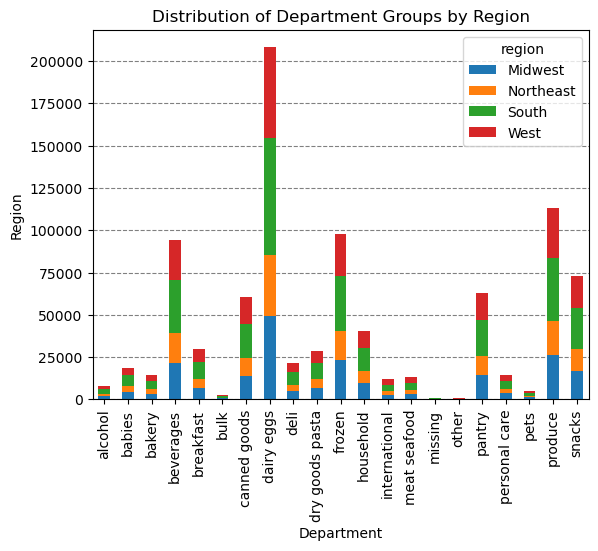

In [143]:
# Region_department Bar Chart

bar5 = region_dep.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Region')
plt.xlabel('Department')

# Exporting bar chart

bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_region_department.png'))

      8.1.4. Dependants

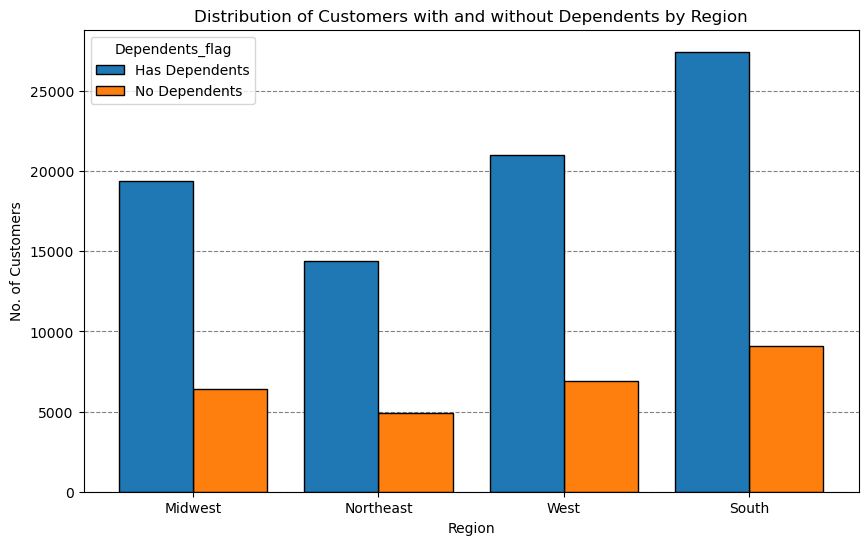

In [144]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='Dependents_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependents by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_dependents_by_region.png'), bbox_inches = 'tight')
plt.show()

8.1.5. Price Range

In [145]:
# Define price_label function
def price_label(row):
    if row['prices'] <= 5:
       return 'Low-range product'
    elif (row['prices'] > 5) and (row['prices'] <= 15):
       return 'Mid-range product'
    elif row['prices'] > 15:
       return 'High range'
    else: return 'Not enough data'

In [146]:
#Apply the function
instacart['price_range'] = instacart.apply(price_label, axis=1)

In [147]:
# Creating crosstab for region and price range

region_pricerange = pd.crosstab(instacart['region'], instacart['price_range'], dropna = False)


In [148]:
# Checking crosstab

region_pricerange

price_range,High range,Low-range product,Mid-range product
region,,,
Midwest,2044,72683,140861
Northeast,1462,55634,105895
South,2651,102739,201397
West,2117,79965,153822


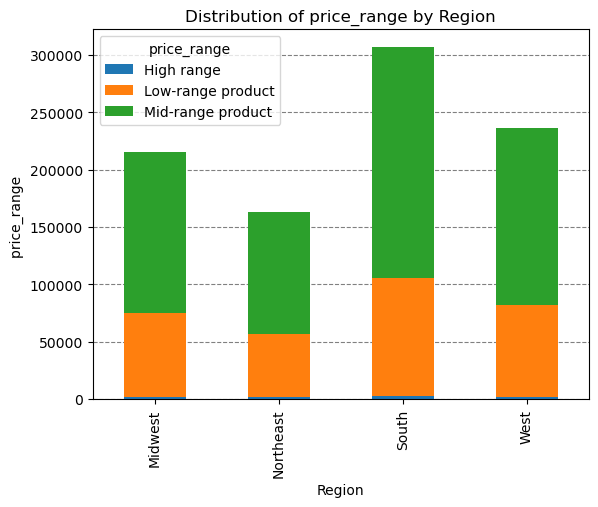

In [149]:
# Region_pricerange Bar Chart

bar6 = region_pricerange.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of price_range by Region')
plt.ylabel('price_range ')
plt.xlabel('Region')

# Exporting bar chart
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_region_pricerange.png'))

                                                             8.2. Profiles by Department Sales

8.2.1. Income Groups

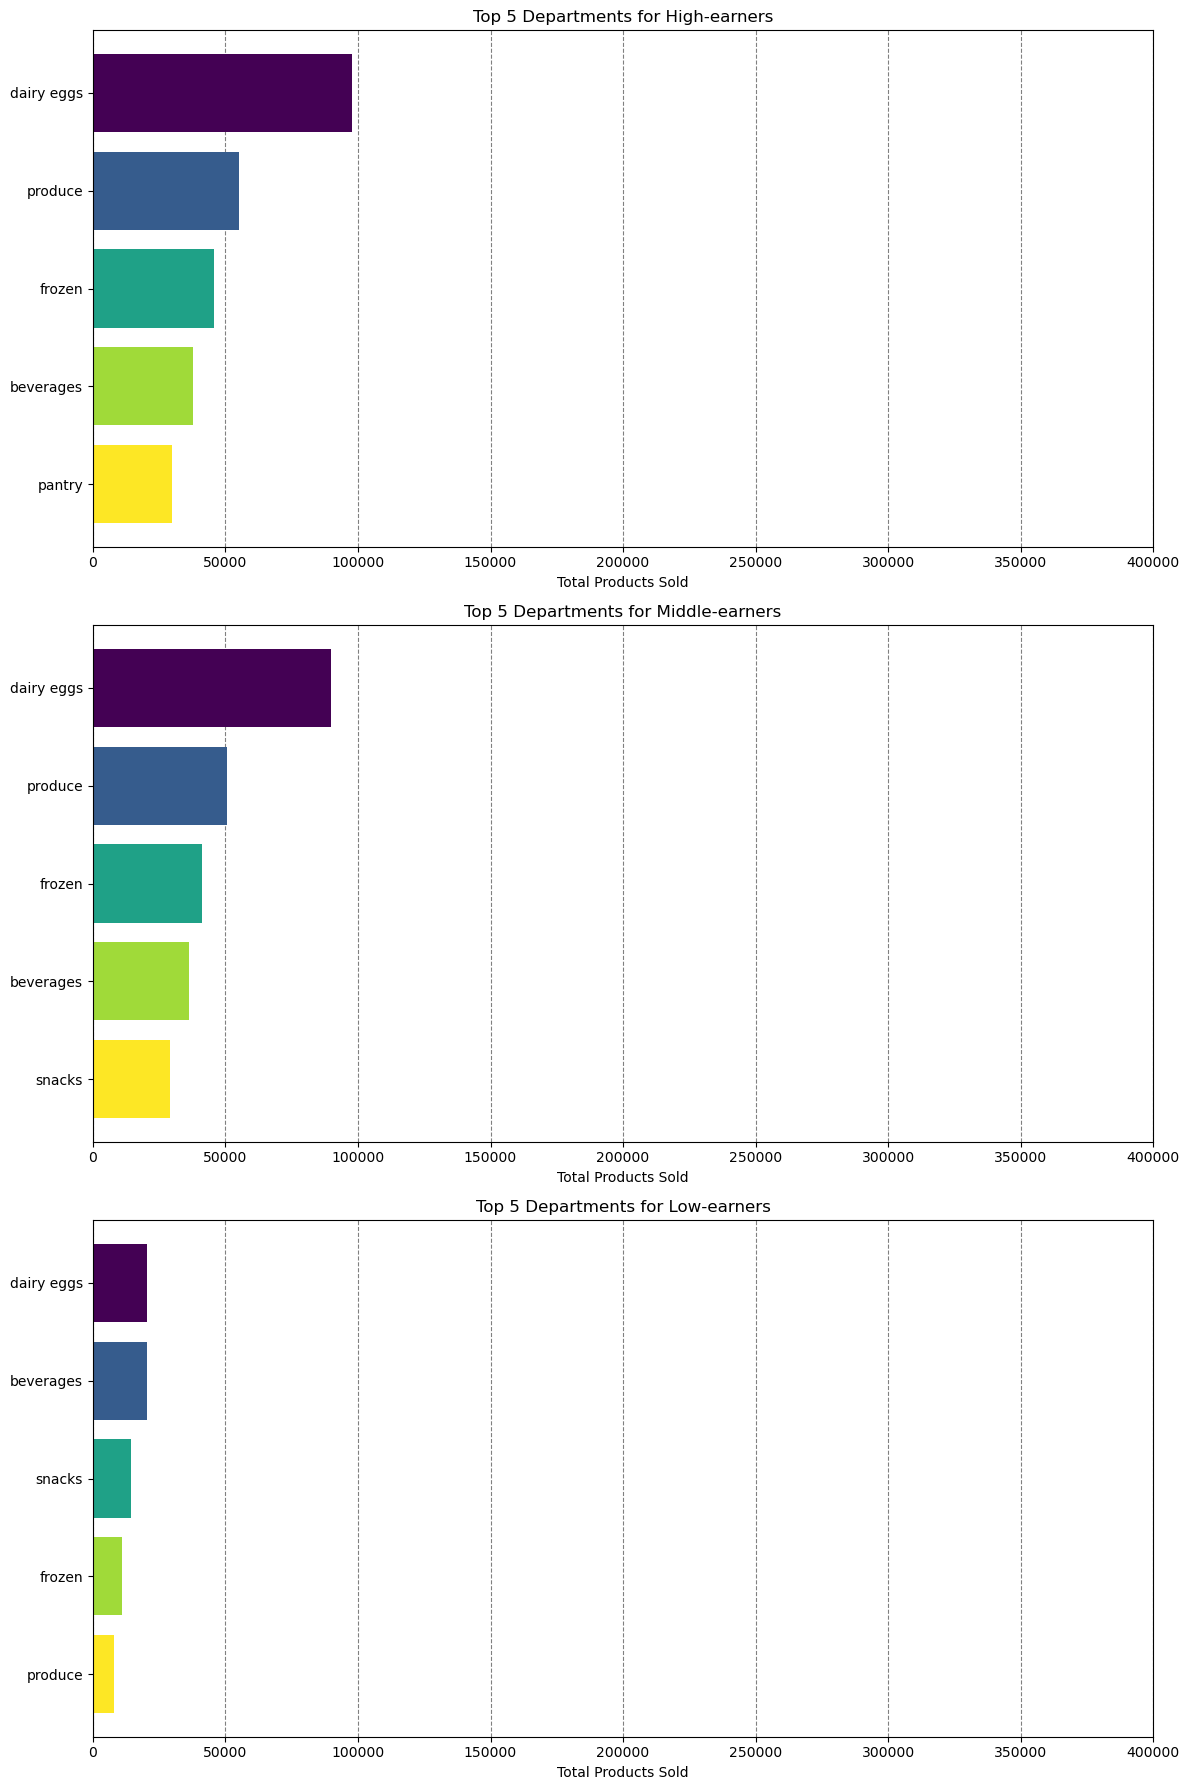

In [191]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = instacart.groupby(['Income_group', 'department']).size().reset_index(name='counts')
income_department_counts.sort_values(by=['Income_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = plt.cm.viridis(np.linspace(0, 2, 8))  # Sets colour palette

# Define the desired order of income groups
desired_order = ['High', 'Middle', 'Low']

# Iterate over each income group and create a horizontal bar chart
for i, Income_group in enumerate(desired_order):
    income_data = income_department_counts[income_department_counts['Income_group'] == Income_group].head(5)
    ax = axs[i]
    ax.barh(income_data['department'], income_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {Income_group}-earners')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 400000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_top_departments_by_Income_group.png'), bbox_inches = 'tight')
plt.show()

Note: Interesting that after "produce" the top departments differ between the income groups. 
Higher earners are more concerned with "dairy/eggs" whereas low-earners buy from "snacks" more often.¶

                                8.2.2. Age Groups

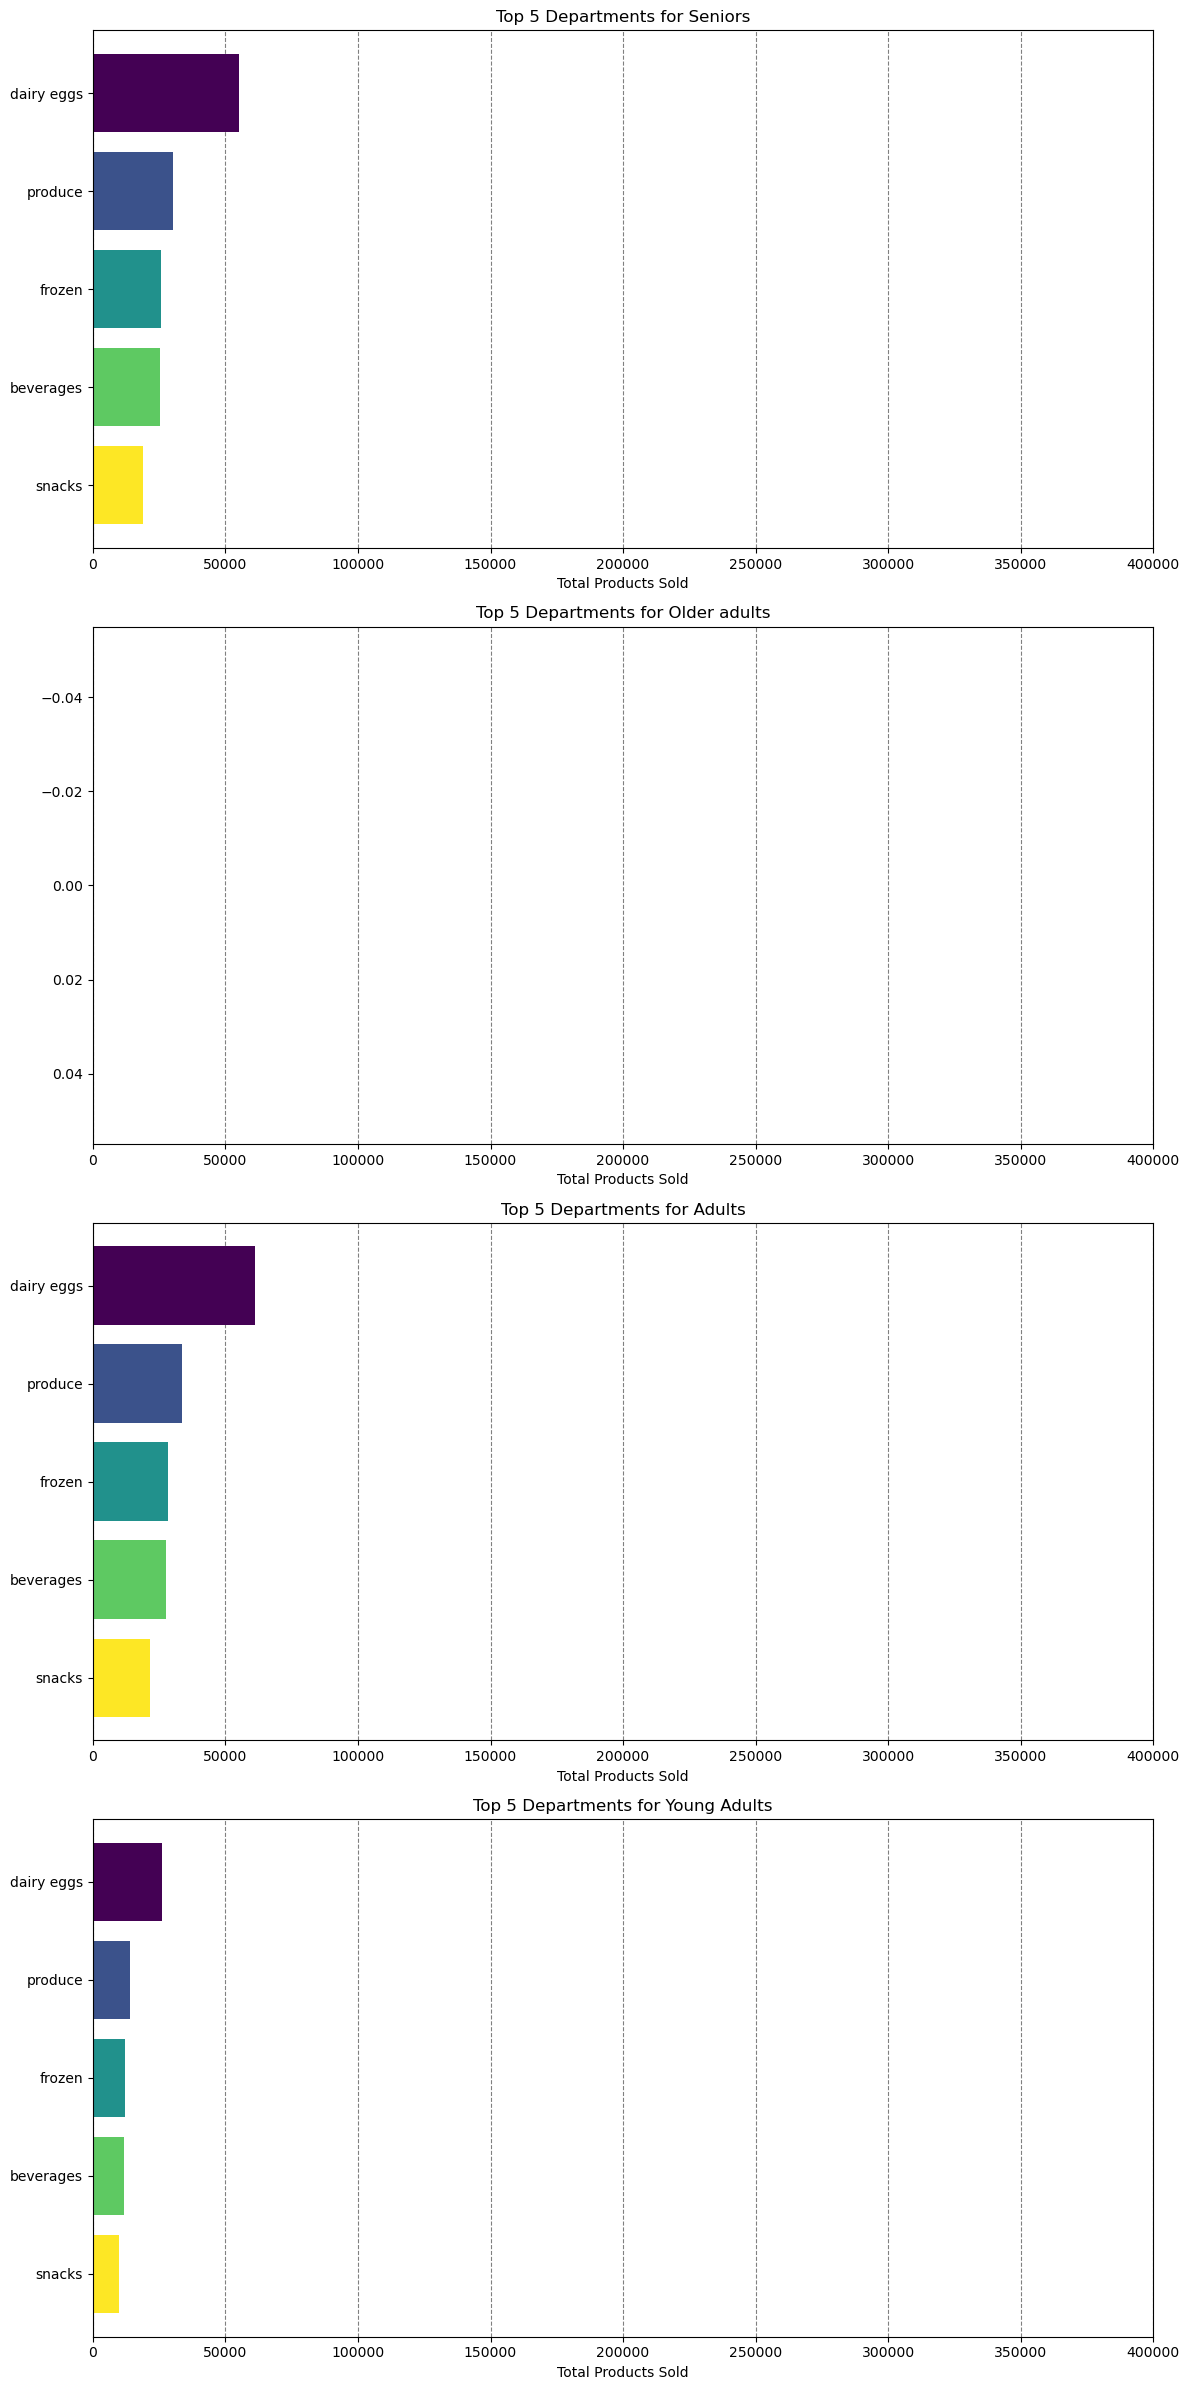

In [192]:
# Group by age_group and department, count occurrences, and sort
age_department_counts = instacart.groupby(['age_group', 'department']).size().reset_index(name='counts')
age_department_counts.sort_values(by=['age_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(4, 1, figsize=(12, 24))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
desired_age_order = ['Senior', 'Older adult', 'Adult', 'Young Adult']

# Iterate over each age group and create a horizontal bar chart
for i, age_group in enumerate(desired_age_order):
    age_data = age_department_counts[age_department_counts['age_group'] == age_group].head(5)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {age_group}s')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 400000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_top_departments_by_age_group.png'), bbox_inches = 'tight')
plt.show()

Strangely, different age groups don't show any differences between the departments they purchase the most products from.

                                                    8.2.3. Dependants

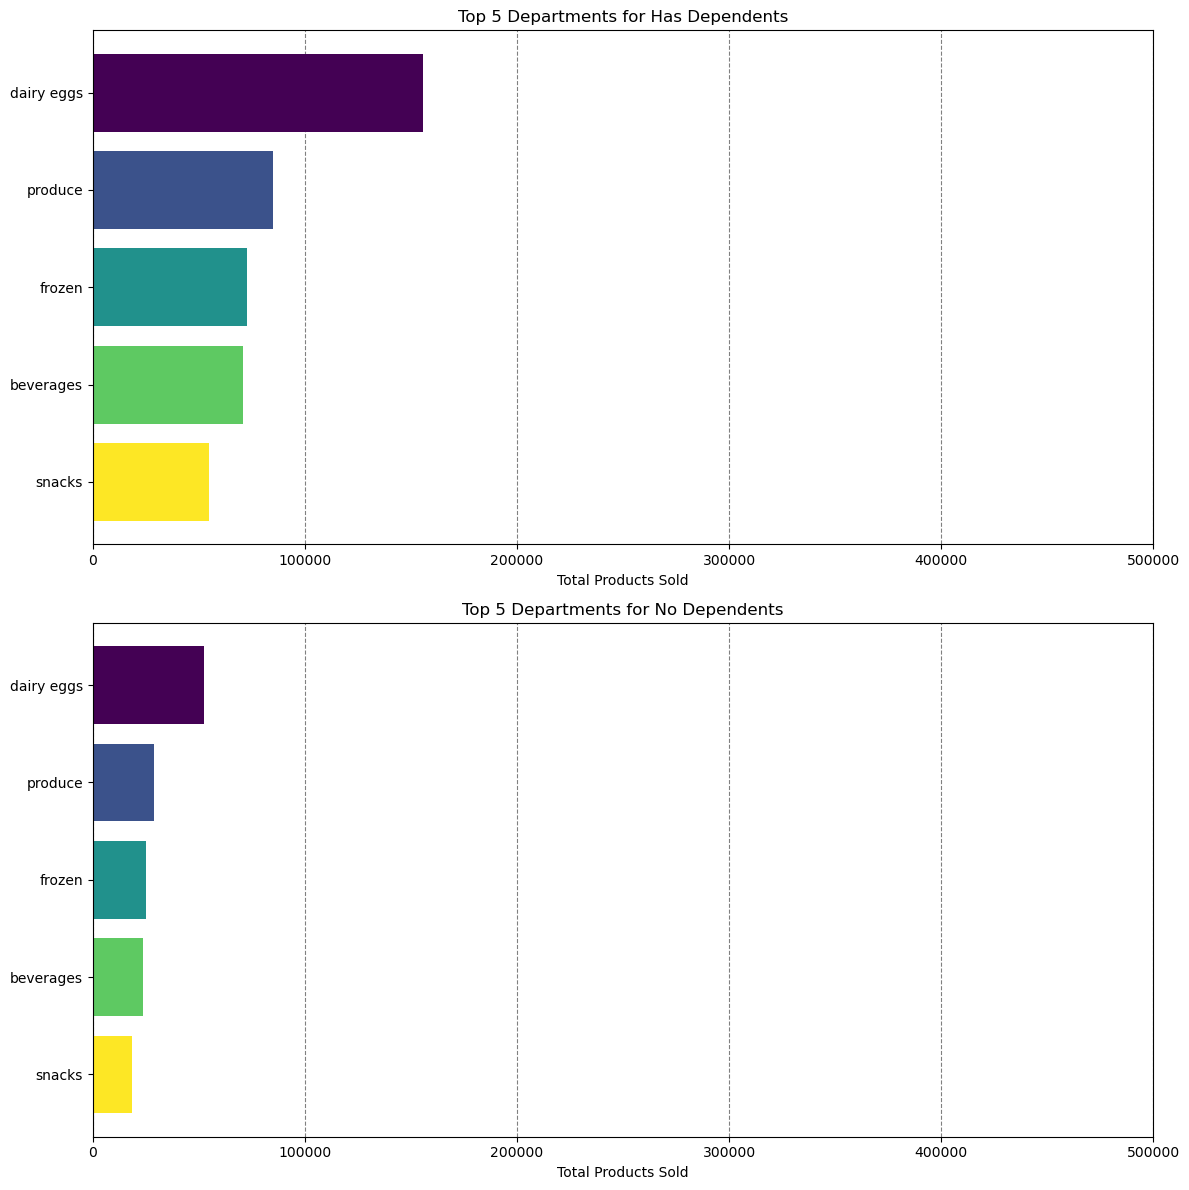

In [224]:
# Group by dependants_flag and department, count occurrences, and sort
dependents_department_counts = instacart.groupby(['Dependents_flag', 'department']).size().reset_index(name='counts')
dependents_department_counts.sort_values(by=['Dependents_flag', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
dependents_order = ['Has Dependents', 'No Dependents']

# Iterate over both dependants_flags and create a horizontal bar chart
for i, dependents_status in enumerate(dependents_order):
    dependents_data = dependents_department_counts[dependents_department_counts['Dependents_flag'] == dependents_status].head(5)
    ax = axs[i]
    ax.barh(dependents_data['department'], dependents_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {dependents_status}')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_top_departments_by_dependents.png'), bbox_inches = 'tight')
plt.show()

Surprisingly, top departments are consistent between these groups with a roughly proportional number of products purchased in each department¶

8.3. Profiles by Frequency

8.3.1. Income Groups

In [225]:
# Creating crosstab for income and frequency

income_freq = pd.crosstab(instacart['Income_group'], instacart['frequency_flag'], dropna = False)

In [226]:
# Checking crosstab

income_freq

frequency_flag,Frequent Customer,Non_frequent_customer,Regular customer
Income_group,,,
High,287878,42979,92160
Low,68655,12623,24009
Middle,265963,40161,86842


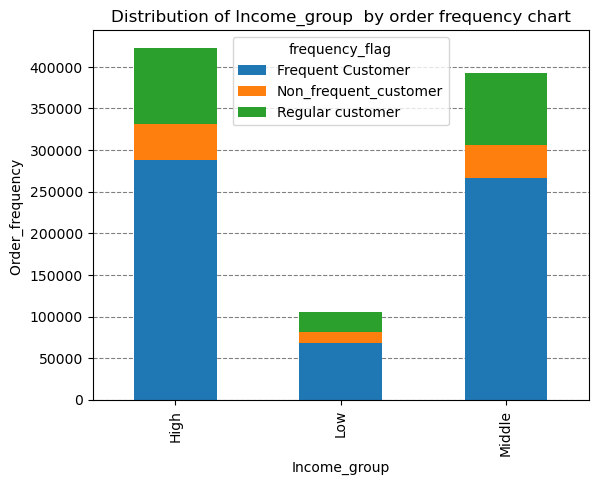

In [227]:
# Income Group and Order frequency Bar Chart

bar7 = income_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Income_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Income_group')

# Exporting bar chart

bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_income_frequency.png'))

8.3.2. Age Groups

In [228]:
# Creating crosstab for age and frequency

age_freq = pd.crosstab(instacart['age_group'], instacart['frequency_flag'], dropna = False)

In [229]:
# Checking crosstab

age_freq

frequency_flag,Frequent Customer,Non_frequent_customer,Regular customer
age_group,,,
Adult,182793,27707,60252
Older Adult,196112,30537,63342
Senior,164783,25429,53460
Young Adult,78808,12090,25957


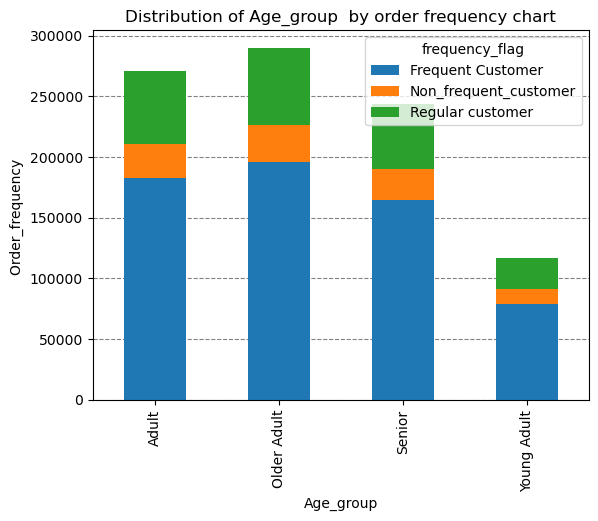

In [230]:
# Region Price Range Bar Chart

bar8 = age_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Age_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Age_group')

# Exporting bar chart

bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_age_freq.png'))

8.3.3. Marital Status

In [231]:
#Rename column 'Unnamed: 0' to 'department_id'

instacart.rename(columns = {'Family Status':'Marital_status'}, inplace = True)

In [232]:
# Creating crosstab for marital status and frequency

marital_freq = pd.crosstab(instacart['Marital_status'], instacart['frequency_flag'], dropna = False)

In [233]:
# Checking crosstab

marital_freq

frequency_flag,Frequent Customer,Non_frequent_customer,Regular customer
Marital_status,,,
divorced/widowed,53567,8334,16716
living with parents and siblings,30700,4701,9349
married,434933,66937,143332
single,103296,15791,33614


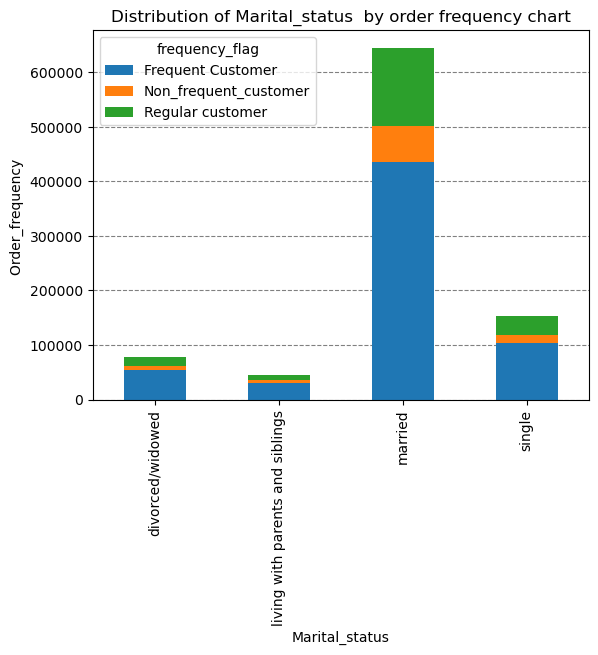

In [234]:
#Marital_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Marital_status  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Marital_status')

# Exporting bar chart

bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_marital_freq.png'))

8.3.4. Departments

In [235]:
# Creating crosstab for department and frequency
dep_freq = pd.crosstab(instacart['department'], instacart['frequency_flag'], dropna = False)

In [236]:
# Checking crosstab
dep_freq

frequency_flag,Frequent Customer,Non_frequent_customer,Regular customer
department,,,
alcohol,5568,753,1855
babies,14447,1108,3181
bakery,9163,1696,3719
beverages,62184,10805,21510
breakfast,20100,2906,6725
bulk,1886,181,422
canned goods,39294,7237,13902
dairy eggs,145920,18954,43125
deli,14021,2171,5068


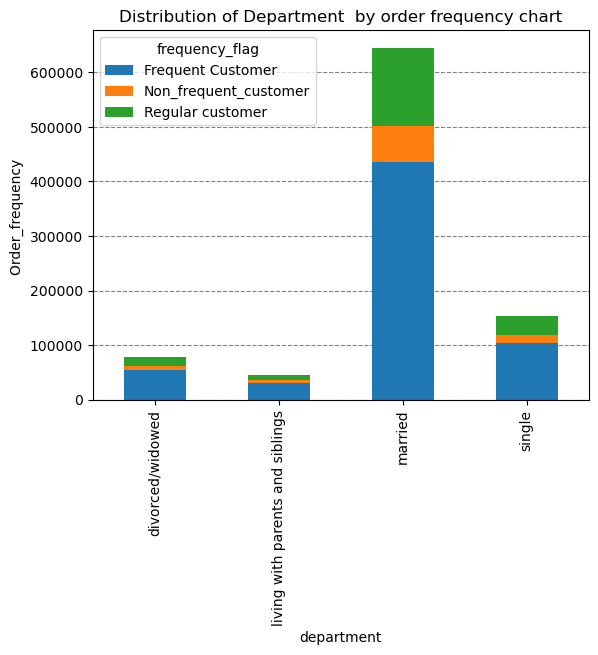

In [237]:
#dept_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('department')

# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_frequency.png'))

                                                                   9. Visualisations

All visualisations have been exported throughout the script

                                                                    10. Export Final Data Set

In [238]:
instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_full_data.pkl'))

Additional Analysis

Top 10 departments for instacart

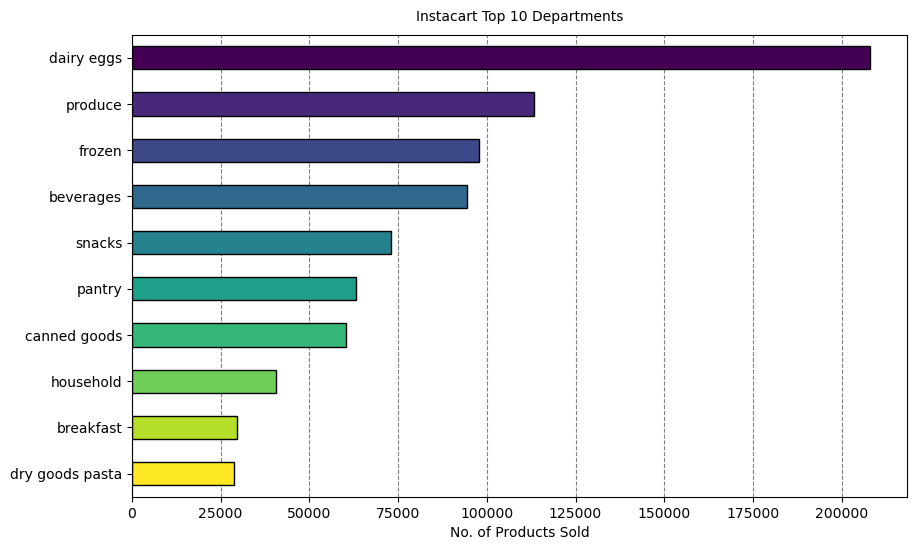

In [239]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

instacart['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, 
                                                                                        zorder = 2, 
                                                                                        edgecolor = 'black')
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'Instacart_department_sales.png'), bbox_inches = 'tight')

In [240]:
# Frequency count
instacart['department'].value_counts(dropna=False)

department
dairy eggs         207999
produce            113414
frozen              97930
beverages           94499
snacks              73068
pantry              63164
canned goods        60433
household           40488
breakfast           29731
dry goods pasta     28616
deli                21260
babies              18736
personal care       14580
bakery              14578
meat seafood        13436
international       11963
alcohol              8176
pets                 4927
bulk                 2489
missing              1126
other                 657
Name: count, dtype: int64

Ordering habits based on loyalty status

In [241]:
# Compute average order_total
loyalty_order_total = orders_subset.groupby('loyalty_flag')['order_total'].mean().sort_values(ascending = False).reset_index()

In [242]:
# Check
loyalty_order_total

,loyalty_flag,order_total
0,Regular customer,9.531060
1,New customer,9.511258
2,Loyal customer,9.393297


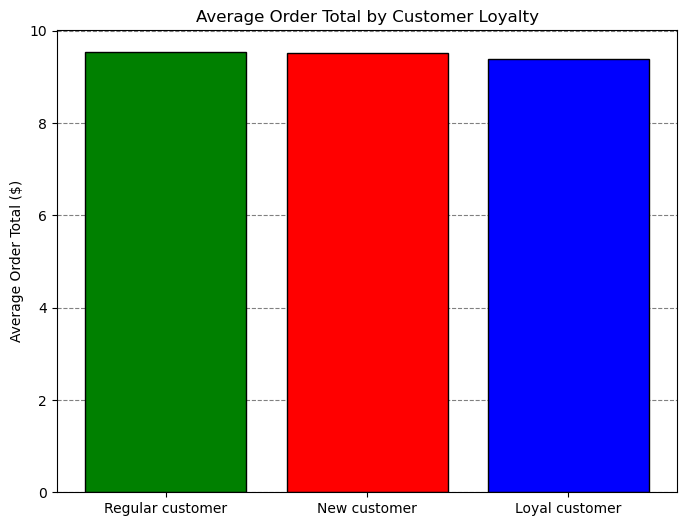

In [243]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))
colors = ['green', 'red', 'blue']

# Plot bars
bars = plt.bar(loyalty_order_total['loyalty_flag'], loyalty_order_total['order_total'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_average_order_by_loyalty.png'), bbox_inches = 'tight')

In [244]:
# Average price of products purchased
product_avg_cost = instacart.groupby('loyalty_flag')['prices'].mean().sort_values(ascending = False).reset_index()

In [245]:
# Check
product_avg_cost

,loyalty_flag,prices
0,New customer,7.801310
1,Regular customer,7.750368
2,Loyal customer,7.674593


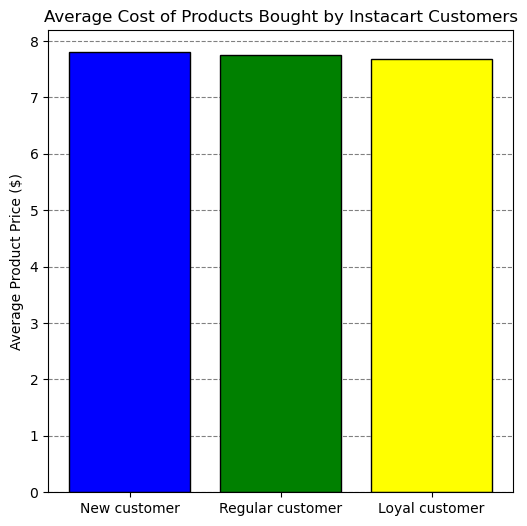

In [246]:
# Set up formatting and colours
plt.figure(figsize=(6, 6))
colors = ['blue', 'green', 'yellow']

# Plot bars
bars = plt.bar(product_avg_cost['loyalty_flag'], product_avg_cost['prices'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Cost of Products Bought by Instacart Customers")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Product Price ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_average_product_price_by_loyalty.png'), bbox_inches = 'tight')

Total product orders:

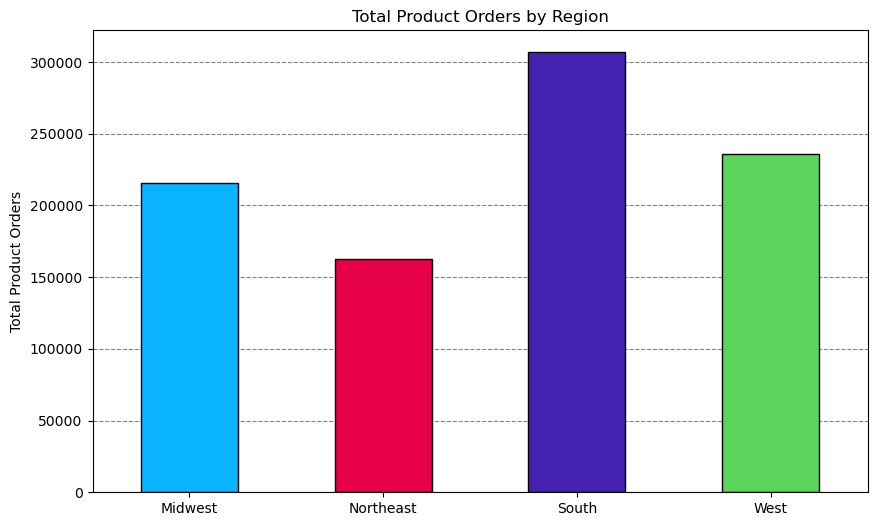

In [247]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
instacart['region'].value_counts().sort_index().plot.bar(color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_total_orders_by_region.png'), bbox_inches = 'tight')

In [248]:
# Average order_total
region_avg_order_total = orders_subset.groupby('region')['order_total'].mean().sort_values(ascending = False).reset_index()

In [249]:
# Check
region_avg_order_total

,region,order_total
0,Midwest,9.519803
1,South,9.479213
2,West,9.477852
3,Northeast,9.450775


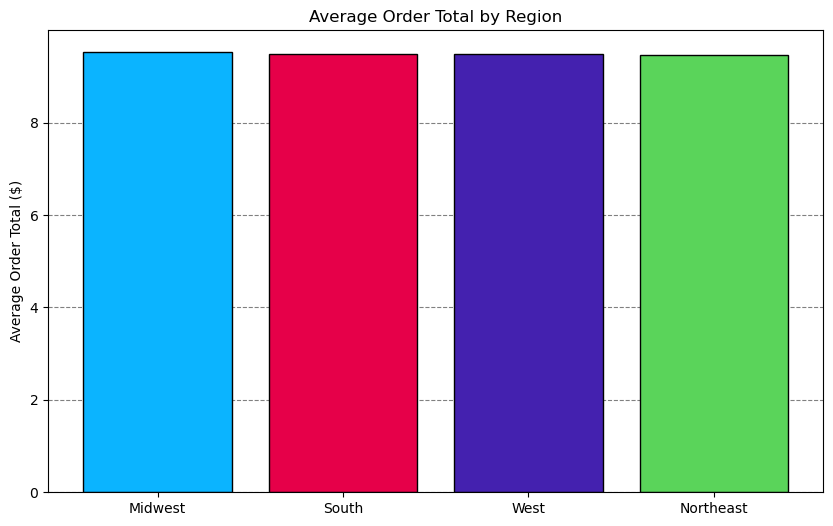

In [250]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(region_avg_order_total['region'], 
               region_avg_order_total['order_total'], 
               color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
               edgecolor='black', 
               zorder=2, 
               alpha = 1)
plt.title("Average Order Total by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_average_order_by_region.png'), bbox_inches = 'tight')

Differences in ordering habits of different customer profiles

In [251]:
# Income groups by the mean of the order_total - multilevel index
sorted_df = aggregations_by_income_cat.sort_values(by=('order_total', 'mean'), ascending=False)

In [252]:
# Check
sorted_df

days_since_prior_order                  order_total            \
                                min       mean   max         min      mean   
Income_group                                                                 
High                            0.0  10.519139  30.0         1.0  9.681512   
Middle                          0.0  10.562307  30.0         1.0  9.535597   
Low                             0.0  11.006426  30.0         1.0  8.527353   

                    
               max  
Income_group        
High          80.1  
Middle        73.5  
Low           65.8

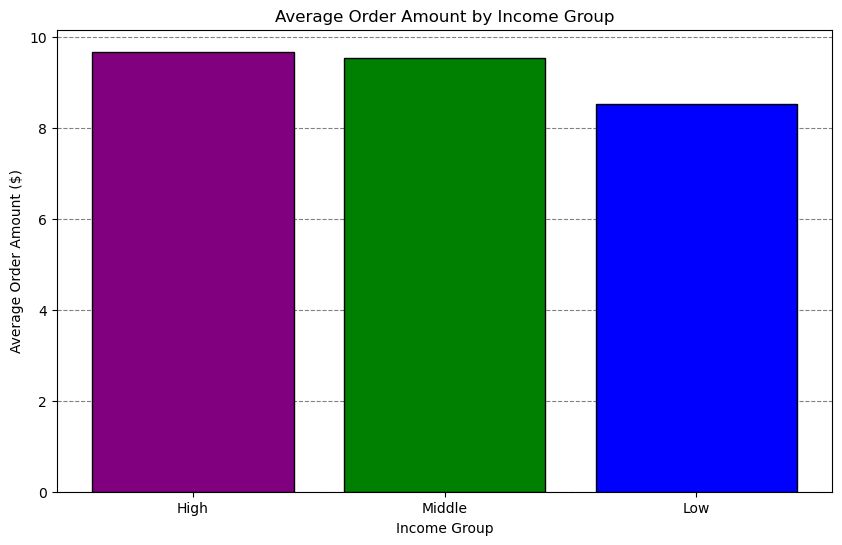

In [253]:
# Make bar chart for average order total
plt.figure(figsize=(10, 6))
plt.bar(sorted_df.index, sorted_df['order_total', 'mean'], color=['purple', 'green', 'blue'], zorder=2, edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Average Order Amount ($)')
plt.title('Average Order Amount by Income Group')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_average_order_amount_by_income.png'), bbox_inches = 'tight')

Creating Frequency_flag, merging it in user_sample and then generating cross-tabulation

In [254]:
# Calculate median_days_between_orders for each user
median_days_between_orders = instacart.groupby('user_id')['days_since_prior_order'].median().reset_index(name='customer_frequency')

# Merge median_days_between_orders with user_sample DataFrame
user_sample = pd.merge(user_sample, median_days_between_orders, on='user_id', how='left')

# Define frequency_flag based on median_days_between_orders
conditions = [
    (user_sample['customer_frequency'] <= 10),
    (user_sample['customer_frequency'] > 10) & (user_sample['customer_frequency'] <= 20),
    (user_sample['customer_frequency'] > 20)
]
choices = ['High', 'Medium', 'Low']

user_sample['frequency_flag'] = pd.cut(user_sample['customer_frequency'], bins=[-float('inf'), 10, 20, float('inf')], labels=['High', 'Medium', 'Low'])

# Generate cross-tabulation
crosstab1 = pd.crosstab(user_sample['Income_group'], user_sample['frequency_flag'], dropna=False)

print(crosstab1)

frequency_flag   High  Medium   Low
Income_group                       
High            25720   13768  9618
Low              7003    4019  3192
Middle          24055   13052  9187


In [255]:
# Check
crosstab1

frequency_flag,High,Medium,Low
Income_group,,,
High,25720,13768,9618
Low,7003,4019,3192
Middle,24055,13052,9187


In [256]:
# Normalise
crosstab1_norm = crosstab1.div(crosstab1.sum(axis=1), axis = 0) * 100
# Check
crosstab1_norm

frequency_flag,High,Medium,Low
Income_group,,,
High,52.376492,28.037307,19.586201
Low,49.268327,28.274940,22.456733
Middle,51.961377,28.193718,19.844904


<Figure size 800x1000 with 0 Axes>

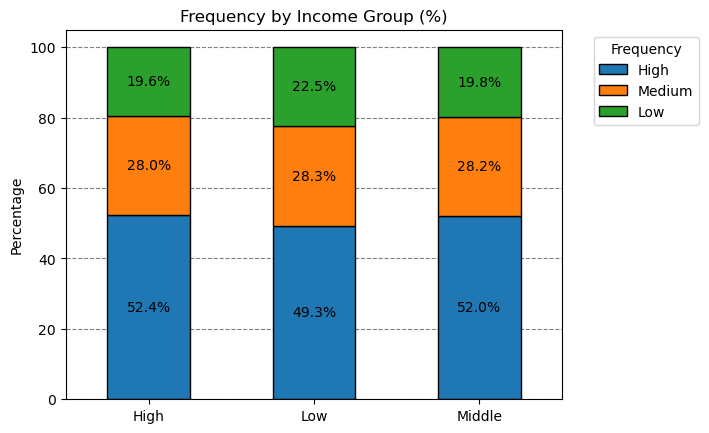

In [257]:
# Graph
plt.figure(figsize=(8, 10)) 
ax = crosstab1_norm.plot(kind='bar', stacked=True, zorder=2, edgecolor='black')

# To show percentages on each section:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'  # Format as percentage
    ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center')

plt.title('Frequency by Income Group (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.legend(title='Frequency',loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_customer_frequency_by_income.png'), bbox_inches = 'tight')

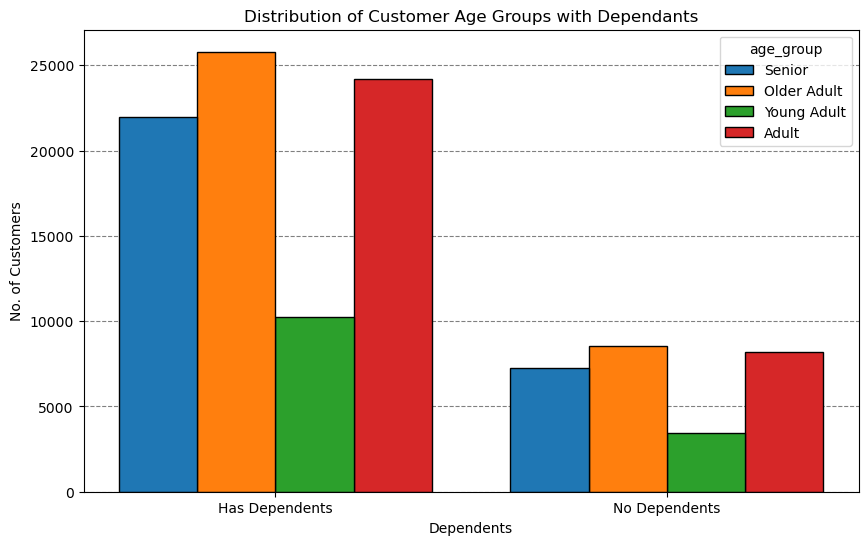

In [258]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='Dependents_flag', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups with Dependants')
plt.ylabel('No. of Customers')
plt.xlabel('Dependents')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'instacart_age_by_dependents.png'), bbox_inches = 'tight')
plt.show()

In [259]:
# Check above graph using crosstab
pd.crosstab(user_sample['age_group'], user_sample['Dependents_flag'], dropna = False)

Dependents_flag,Has Dependents,No Dependents
age_group,,
Adult,24223,8165
Older Adult,25800,8555
Senior,21946,7237
Young Adult,10273,3415


C:\Users\25670\AppData\Local\Temp\ipykernel_2448\3035920928.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_parents['group'] = 'Young Parents'
C:\Users\25670\AppData\Local\Temp\ipykernel_2448\3035920928.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_adults['group'] = 'Single Adults'


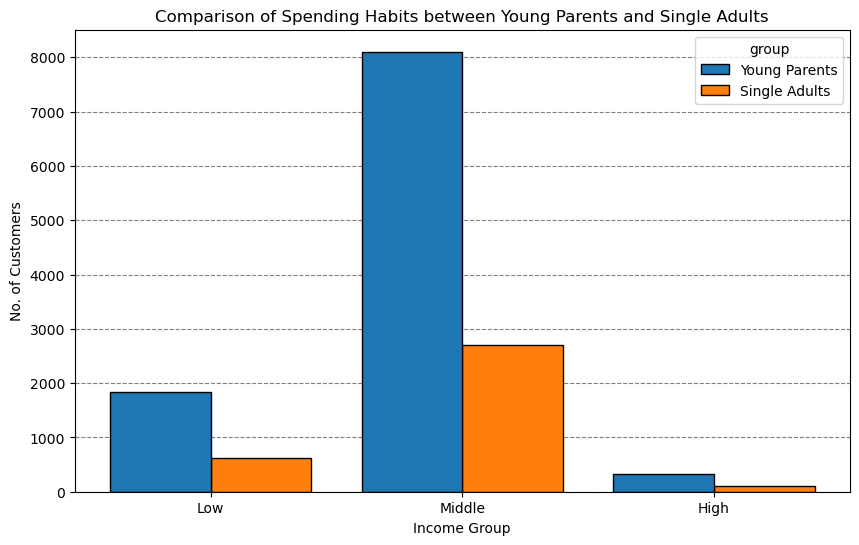

In [260]:
# Filter data for young parents and single adults
young_parents = user_sample[(user_sample['Dependents_flag'] == 'Has Dependents') & (user_sample['age_group'] == 'Young Adult')]
single_adults = user_sample[(user_sample['Dependents_flag'] == 'No Dependents') & (user_sample['age_group'] == 'Young Adult')]

# Combine filtered data and add a 'group' column
young_parents['group'] = 'Young Parents'
single_adults['group'] = 'Single Adults'
combined_data = pd.concat([young_parents, single_adults])

plt.figure(figsize=(10, 6))
# Plot the histogram bars with group breakdown
sns.histplot(data=combined_data, x='Income_group', hue='group', multiple='dodge', shrink=.8, alpha=1, element='bars', stat='count', common_norm=False)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Comparison of Spending Habits between Young Parents and Single Adults')
plt.ylabel('No. of Customers')
plt.xlabel('Income Group')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'young_parents_vs_single_adults_income_group.png'), bbox_inches='tight')
plt.show()


In [261]:
# Create a pivot table for the crosstab
pivot_table = pd.pivot_table(user_sample,
                             values='user_id',  # Assuming 'user_id' is a unique identifier
                             index=['age_group'],
                             columns=['Income_group', 'frequency_flag'],
                             aggfunc='count',  # Count the occurrences
                             fill_value=0,  # Replace NaN with 0
                             dropna=False)  # Include missing values

# Display the pivot table
pivot_table

Income_group     High                Low              Middle             
frequency_flag   High Medium   Low  High Medium   Low   High Medium   Low
age_group                                                                
Adult            2876   1540  1042  2594   1569  1192  11300   6067  4208
Older Adult     12153   6520  4660  1697    989   804   3895   2130  1507
Senior          10465   5583  3846  1439    818   654   3285   1791  1302
Young Adult       226    125    70  1273    643   542   5575   3064  2170

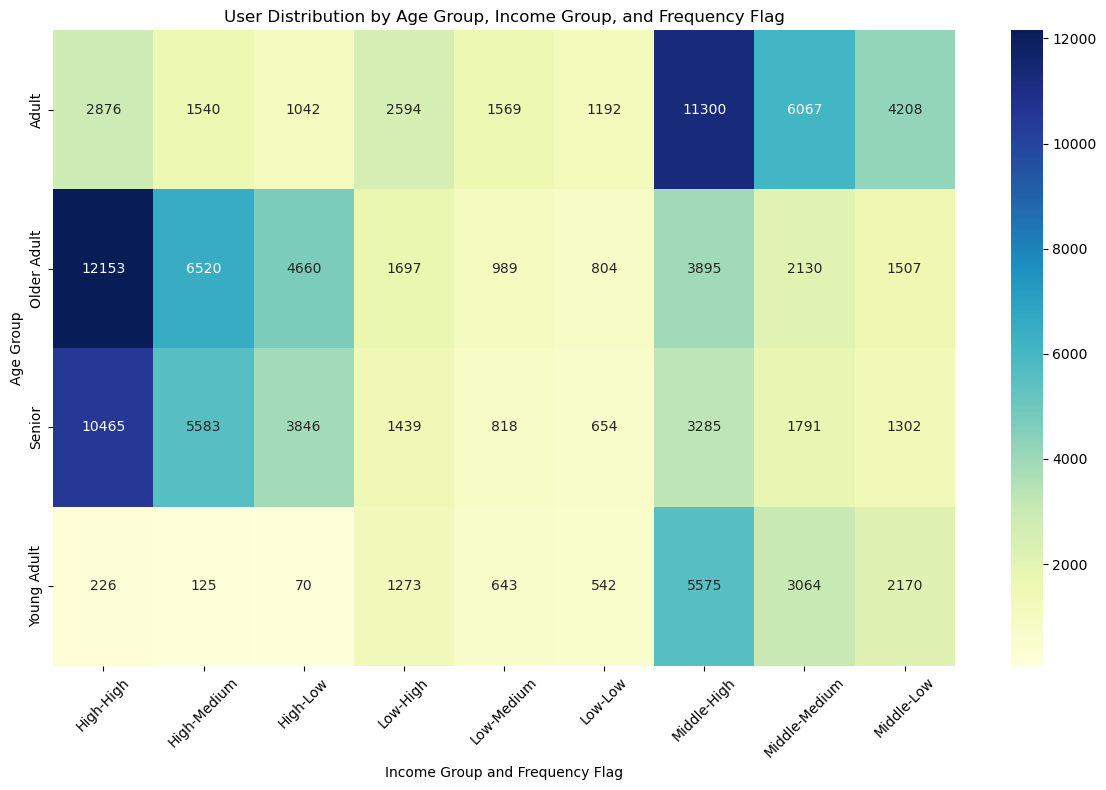

In [262]:
plt.figure(figsize=(12, 8))
# Plot heatmap
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('User Distribution by Age Group, Income Group, and Frequency Flag')
plt.xlabel('Income Group and Frequency Flag')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, 'user_distribution_heatmap.png'), bbox_inches='tight')
plt.show()
